In [144]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime
from sklearn import model_selection
from sklearn.svm import SVR
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [129]:
df = pd.read_csv('train.csv')
df.head(15)

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
5,mlm,4f5f3743,2020-06-11T09:12:37,Peggy,Добавлено больше логирования и фикс до частичн...,6
6,mlm,24a11c40,2020-06-10T15:34:22,Victor,"Отладка, чтоб оно хотябы запускалось",4
7,mlm,3287c74a,2020-06-10T15:34:04,Victor,Добавил скрипт для запуска контейнера,4
8,mlm,c78d5187,2020-06-10T15:22:21,Victor,label не нужен,2
9,mlm,bcb47e60,2020-06-10T14:54:14,Victor,Установка всех зависимостей теперь в докер файле,5


In [130]:
# Кодирование и удаление
label_encoder = LabelEncoder()
df['repository_name'] = label_encoder.fit_transform(df['repository_name'])
df = pd.get_dummies(df, prefix='is_', columns=['commit_author'])
df['commit_date'] = df['commit_date'].map(
    lambda x: datetime.fromisoformat(x).timestamp())
df = df.drop(['commit_hash', 'commit_message'], axis=1)
df.head(15)

,repository_name,commit_date,bugs,is__Alice,is__Bob,is__Carol,is__Dabe,is__Eve,is__Mallory,is__Peggy,is__Trudy,is__Victor,is__Wendy
0,3,1.591961e+09,4,0,0,0,0,0,0,0,0,1,0
1,3,1.591952e+09,3,0,0,0,0,0,0,0,0,1,0
2,3,1.591878e+09,4,0,0,0,0,0,0,0,0,1,0
3,3,1.591861e+09,3,0,0,0,0,0,0,0,0,1,0
4,3,1.591857e+09,7,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,4,1.584957e+09,1,0,0,0,1,0,0,0,0,0,0
315,4,1.584956e+09,2,0,0,0,1,0,0,0,0,0,0
316,4,1.584952e+09,3,0,0,0,1,0,0,0,0,0,0
317,4,1.584952e+09,1,0,0,0,1,0,0,0,0,0,0


In [131]:
Y = df['bugs'].values
df = df.drop('bugs', axis=1)
X = df.values
Y = Y.reshape(Y.shape[0], 1)
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [132]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X,
    Y,
    test_size=0.20,
    random_state=42,
)

In [148]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

c:\users\ad\pycharmprojects\absoft_test\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [149]:
y_pred = regressor.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
y_test = sc_y.inverse_transform(y_test.reshape(y_test.shape[0], 1))

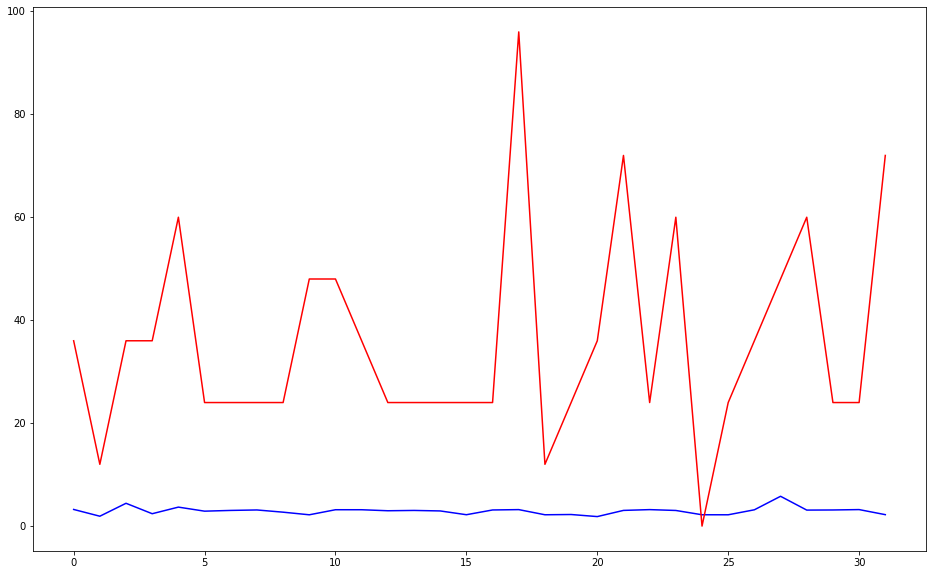

In [151]:
plt.figure(figsize=[16, 10]).patch.set_facecolor('w')

plt.plot(y_pred, color = 'blue', label='y_pred')
plt.plot(y_test, color = 'red', label='y_test')
plt.show()